<a href="https://colab.research.google.com/github/TWEEDOriginal/learn-data-science/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics._plot.roc_curve import RocCurveDisplay

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

In [35]:
if IN_COLAB:
  datafile = "https://raw.githubusercontent.com/TWEEDOriginal/learn-data-science/refs/heads/main/classification/heart-disease.csv"
else:
  datafile = "heart-disease.csv"
df = pd.read_csv(datafile)

In [36]:
# df.columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [42]:
# Replace 'yes' with 1 and 'no' with 0
df['target'] = df['target'].replace({'yes': 1, 'no': 0})
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

<ipython-input-42-d0cfa10556b5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 1, 'female': 0})


In [24]:
df.shape #(rows, columns)

(303, 14)

In [37]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,4
chol,1
fbs,0
restecg,0
thalach,5
exang,0
oldpeak,0


In [44]:
df.fillna({'trestbps': df['trestbps'].mean()}, inplace=True)
df.fillna({'chol':df['chol'].median()}, inplace=True)
df.fillna({'thalach': df['thalach'].mode()[0]}, inplace=True)
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [45]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [46]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


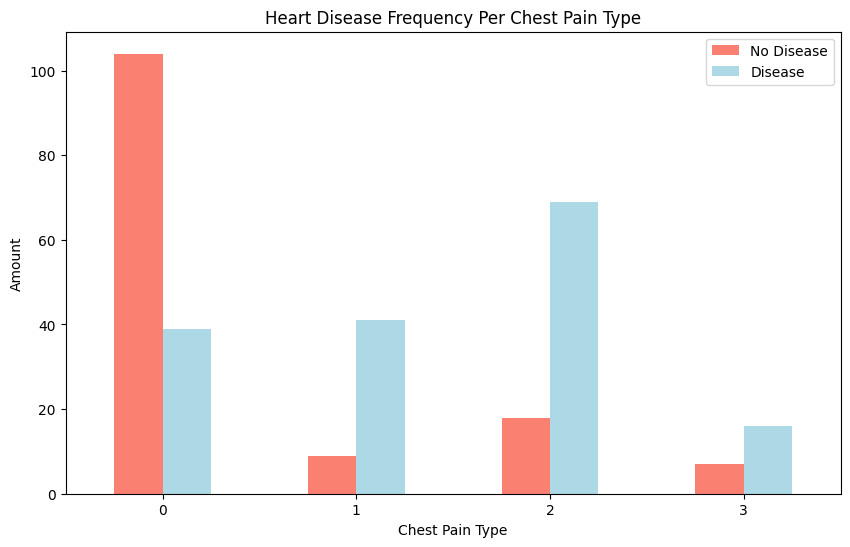

In [47]:
# This will give you the output needed
print(pd.crosstab(df.cp, df.target))

# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

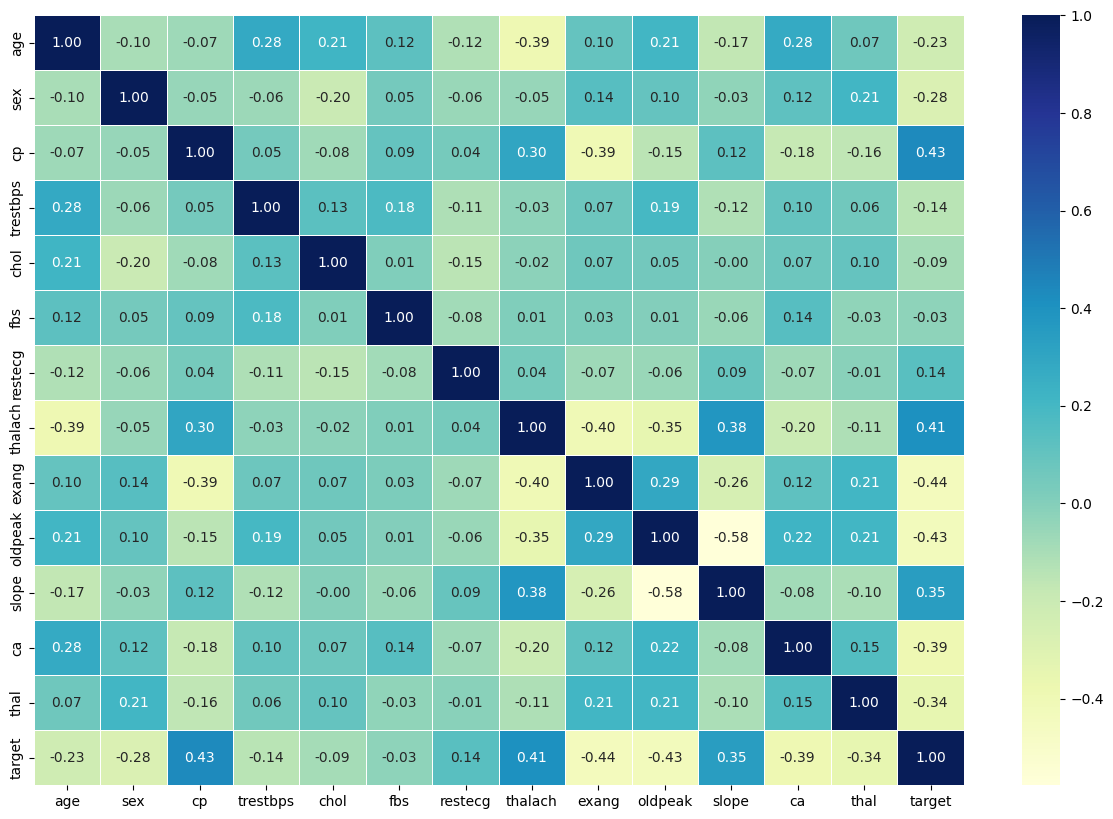

In [50]:
# Lets make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [33]:
# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [2, 4, 6, 8],
    'C': [1, 3, 5, 7]
})

# Calculate the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)

     A    B    C
A  1.0  1.0  1.0
B  1.0  1.0  1.0
C  1.0  1.0  1.0


In [60]:
# Split the data into X & Y
x = df.drop("target", axis=1)
y = df["target"]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2


In [61]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [64]:
# Split data into train and test sets
np.random.seed(42)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [69]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [98]:
# Put models in a dictionary
models = {"Linear SVC": LinearSVC(),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [99]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.8524590163934426,
 'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8524590163934426}

In [76]:
# Hyperparameter Tuning
# Tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(x_train, y_train)

    # Update the training score list
    train_scores.append(knn.score(x_train, y_train))

    # Update the test score list
    test_scores.append(knn.score(x_test, y_test))

Maximum KNN score on the test data: 75.41%


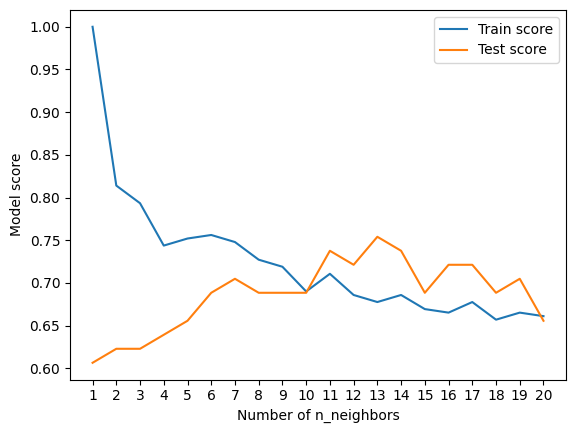

In [78]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of n_neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

> GridSearch more exhaustive than RandomizedSearch



In [79]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [84]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 29.763514416313132}

In [90]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)
print(rs_rf.best_params_)
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 560, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_depth': 5}


0.8688524590163934

In [91]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);
# Check the best hyperparmaters
print(gs_log_reg.best_params_)
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 0.1082636733874054, 'solver': 'liblinear'}


0.8852459016393442

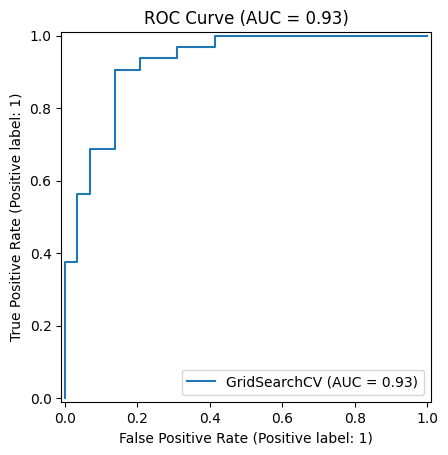

In [93]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
# Plot ROC curve and calculate and calculate AUC metric
from sklearn.metrics import roc_auc_score
roc_display = RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.title(f"ROC Curve (AUC = {roc_auc_score(y_test, gs_log_reg.predict_proba(x_test)[:, 1]):.2f})")
plt.show()

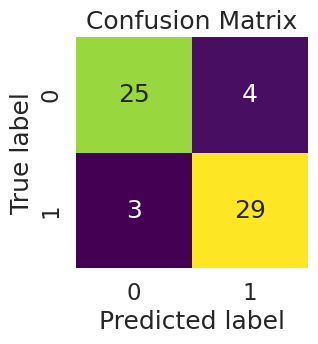

In [96]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     cmap='viridis')
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis
    plt.title("Confusion Matrix")

plot_conf_mat(y_test, y_preds)